In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'E:/python/data/学习赛/LendingClub/datasets/datasets/loan.csv')
data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0      NaN        NaN      14000        14000          14000.0   36 months   
1      NaN        NaN      35000        35000          34725.0   36 months   
2      NaN        NaN      21000        21000          21000.0   60 months   
3      NaN        NaN       6400         6400           6400.0   36 months   
4      NaN        NaN       9500         9500           9500.0   36 months   
...     ..        ...        ...          ...              ...         ...   
399995 NaN        NaN      12000        12000          12000.0   60 months   
399996 NaN        NaN      12000        12000          12000.0   60 months   
399997 NaN        NaN      10000        10000          10000.0   36 months   
399998 NaN        NaN      12000        12000          12000.0   60 months   
399999 NaN        NaN      16550        16550          16550.0   60 months   

        int_rate  installment grade sub_grade  ...  \
0          13.49       475.03     C        C1  ...   
1          17.27      1252.56     D        D3  ...   
2          19.42       549.62     E        E3  ...   
3          10.65       208.47     B        B2  ...   
4          11.71       314.23     B        B3  ...   
...          ...          ...   ...       ...  ...   
399995     14.08       279.72     C        C3  ...   
399996     25.82       358.01     E        E4  ...   
399997     11.99       332.10     B        B5  ...   
399998     21.45       327.69     D        D5  ...   
399999     21.45       451.94     D        D5  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
399995                            NaN                          NaN   
399996                            NaN                          NaN   
399997                            NaN                          NaN   
399998                            NaN                          NaN   
399999                            NaN                          NaN   

       disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                     Cash                     N                       NaN   
1                     Cash                     N                       NaN   
2                     Cash                     N                       NaN   
3                     Cash                     N                       NaN   
4                     Cash                     N                       NaN   
...                    ...                   ...                       ...   
399995                Cash                     N                       NaN   
399996                Cash                     N                       NaN   
399997                Cash                     N                       NaN   
399998                Cash                     N                       NaN   
399999                Cash                     N                       NaN   

       settlement_status settlement_date settlement_amount  \
0                    NaN             NaN               NaN   
1                    NaN             NaN               NaN   
2                    NaN             NaN               NaN   
3                    NaN             NaN               NaN   
4                    NaN             NaN               NaN   
...                  ...             ...               ...   
399995               NaN             NaN               NaN   
399996               NaN             NaN               NaN   
399997               NaN             NaN               NaN   
399998               NaN

In [60]:
nan = data.isna().sum()
for i,v in zip(range(nan.shape[0]),nan.index):
    print(v,nan[i])

id 400000
member_id 400000
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 25985
emp_length 22962
home_ownership 0
annual_inc 4
verification_status 0
issue_d 0
loan_status 0
pymnt_plan 0
url 400000
desc 353675
purpose 0
title 13
zip_code 0
addr_state 0
dti 222
delinq_2yrs 29
earliest_cr_line 29
inq_last_6mths 29
mths_since_last_delinq 209899
mths_since_last_record 336814
open_acc 29
pub_rec 29
revol_bal 0
revol_util 414
total_acc 29
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 406
last_pymnt_amnt 0
next_pymnt_d 295734
last_credit_pull_d 35
collections_12_mths_ex_med 145
mths_since_last_major_derog 304408
policy_code 0
application_type 0
annual_inc_joint 382789
dti_joint 382789
verification_status_joint 382795
acc_now_delinq 29
tot_coll_amt 45723
tot_cur_bal 45723
open_acc_6m 281352
open_

In [61]:
miss_info = nan.sort_values(ascending=False).reset_index()
miss_info.columns = ['feature','count']
miss_info['rate'] = miss_info['count']/data.shape[0]
miss_info[miss_info['rate']>0.3]

feature   count      rate
0                                           id  400000  1.000000
1                                    member_id  400000  1.000000
2                                          url  400000  1.000000
3   orig_projected_additional_accrued_interest  399275  0.998188
4                          hardship_start_date  399109  0.997772
5                            hardship_end_date  399109  0.997772
6                      payment_plan_start_date  399109  0.997772
7                              hardship_length  399109  0.997772
8                                 hardship_dpd  399109  0.997772
9                         hardship_loan_status  399109  0.997772
10              hardship_payoff_balance_amount  399109  0.997772
11                               deferral_term  399109  0.997772
12                hardship_last_payment_amount  399109  0.997772
13                             hardship_status  399109  0.997772
14                             hardship_reason  399109  0.997772
15                               hardship_type  399109  0.997772
16                             hardship_amount  399109  0.997772
17                       settlement_percentage  395178  0.987945
18                             settlement_term  395178  0.987945
19                   debt_settlement_flag_date  395178  0.987945
20                           settlement_amount  395178  0.987945
21                             settlement_date  395178  0.987945
22                           settlement_status  395178  0.987945
23         sec_app_mths_since_last_major_derog  393976  0.984940
24                          sec_app_revol_util  383141  0.957852
25                   verification_status_joint  382795  0.956987
26                             revol_bal_joint  382790  0.956975
27                            annual_inc_joint  382789  0.956973
28                    sec_app_earliest_cr_line  382789  0.956973
29                      sec_app_inq_last_6mths  382789  0.956973
30                            sec_app_mort_acc  382789  0.956973
31                            sec_app_open_acc  382789  0.956973
32                         sec_app_open_act_il  382789  0.956973
33                       sec_app_num_rev_accts  382789  0.956973
34            sec_app_chargeoff_within_12_mths  382789  0.956973
35          sec_app_collections_12_mths_ex_med  382789  0.956973
36                                   dti_joint  382789  0.956973
37                                        desc  353675  0.884188
38                      mths_since_last_record  336814  0.842035
39                    mths_since_recent_bc_dlq  313238  0.783095
40                 mths_since_last_major_derog  304408  0.761020
41                                     il_util  299960  0.749900
42                                next_pymnt_d  295734  0.739335
43                          mths_since_rcnt_il  285693  0.714233
44                                    all_util  281389  0.703472
45                                 open_rv_24m  281352  0.703380
46                                      inq_fi  281352  0.703380
47                                  max_bal_bc  281352  0.703380
48                                 open_il_24m  281352  0.703380
49                                 open_rv_12m  281352  0.703380
50                                total_bal_il  281352  0.703380
51                                 open_il_12m  281352  0.703380
52                                 open_act_il  281352  0.703380
53                                 open_acc_6m  281352  0.703380
54                                inq_last_12m  281352  0.703380
55                                 total_cu_tl  281352  0.703380
56              mths_since_recent_revol_delinq  279884  0.699710
57                      mths_since_last_delinq  209899  0.524748

In [62]:
data = data.dropna(thresh=0.7*data.shape[0],axis=1)
data.shape

(400000, 87)

In [63]:
row_missing = data.apply(lambda x:x.isnull().sum()/data.shape[1], axis=1)
row_missing

0         0.390805
1         0.390805
2         0.390805
3         0.390805
4         0.390805
            ...   
399995    0.000000
399996    0.000000
399997    0.000000
399998    0.022989
399999    0.011494
Length: 400000, dtype: float64

In [64]:
data['row_missing'] = row_missing<0.1
data  = data[data['row_missing']]
data.drop(['row_missing'], axis=1, inplace=True)
data

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
3188        15000        15000          15000.0   60 months     12.39   
3189        10400        10400          10400.0   36 months      6.99   
3190        21425        21425          21425.0   60 months     15.59   
3191        12800        12800          12800.0   60 months     17.14   
3192         9600         9600           9600.0   36 months     13.66   
...           ...          ...              ...         ...       ...   
399995      12000        12000          12000.0   60 months     14.08   
399996      12000        12000          12000.0   60 months     25.82   
399997      10000        10000          10000.0   36 months     11.99   
399998      12000        12000          12000.0   60 months     21.45   
399999      16550        16550          16550.0   60 months     21.45   

        installment grade sub_grade                        emp_title  \
3188         336.64     C        C1                       MANAGEMENT   
3189         321.08     A        A3   Truck Driver Delivery Personel   
3190         516.36     D        D1  Programming Analysis Supervisor   
3191         319.08     D        D4        Senior Sales Professional   
3192         326.53     C        C3                 Admin Specialist   
...             ...   ...       ...                              ...   
399995       279.72     C        C3                     house keeper   
399996       358.01     E        E4                    Skilled Labor   
399997       332.10     B        B5                          Teacher   
399998       327.69     D        D5                              NaN   
399999       451.94     D        D5                       BABYSITTER   

       emp_length  ... percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
3188    10+ years  ...              0.0                   0.0       0.0   
3189      8 years  ...             14.3                   0.0       0.0   
3190      6 years  ...            100.0                   0.0       0.0   
3191    10+ years  ...            100.0                   0.0       0.0   
3192    10+ years  ...             60.0                   0.0       0.0   
...           ...  ...              ...                   ...       ...   
399995  10+ years  ...             66.7                   0.0       0.0   
399996   < 1 year  ...             50.0                   0.0       0.0   
399997  10+ years  ...            100.0                   0.0       0.0   
399998        NaN  ...              0.0                   0.0       0.0   
399999    3 years  ...             20.0                   0.0       0.0   

       tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
3188          196500.0          149140.0        10000.0   
3189          179407.0           15030.0        13000.0   
3190           57073.0           42315.0        15000.0   
3191          368700.0           18007.0         4400.0   
3192           52490.0           38566.0        21100.0   
...                ...               ...            ...   
399995         73948.0           45212.0         6200.0   
399996        382275.0           12928.0        11400.0   
399997        203417.0           36448.0         2000.0   
399998        118975.0           65238.0        22000.0   
399999         50700.0           25760.0        19500.0   

       total_il_high_credit_limit hardship_flag disbursement_method  \
3188                      12000.0             N                Cash   
3189                      11325.0             N                Cash   
3190                      35573.0             N                Cash   
3191                      18000.0             N                Cash   
3192                      24890.0             N                Cash   
...                           ...           ...                 ...   
399995                    49448.0             N                Cash   
399996                    12125.0             N                Cash   
399997           

In [69]:
data.loc[data['emp_length'].isna(),'emp_length'] = 'Unknow'

In [72]:
data['dti'].fillna(data['dti'].median(), inplace=True)

In [78]:
_data = data.copy()
rfr = RandomForestRegressor()
col = ['loan_amnt', 'int_rate', 'installment', 'revol_bal', 'collection_recovery_fee'] 
r_train = _data[data['revol_util'].notna()]
r_test = _data[data['revol_util'].isna()]
rfr.fit(r_train.loc[:,col],r_train['revol_util'])
r_test['revol_util'] = rfr.predict(r_test.loc[:,col])
r_test

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
4378        26400        26400          26400.0   60 months     17.86   
6617        28000        28000          28000.0   60 months      8.19   
7353         8950         8950           8950.0   36 months     16.49   
8793         4850         4850           4850.0   36 months     19.24   
10340        8500         8500           8500.0   36 months      8.67   
...           ...          ...              ...         ...       ...   
399065       2400         2400           2400.0   36 months     20.00   
399202      20000        20000          20000.0   60 months     14.08   
399354      12000        12000          12000.0   36 months      9.93   
399722      10000        10000          10000.0   36 months     14.08   
399846      35000        35000          35000.0   36 months     30.17   

        installment grade sub_grade            emp_title emp_length  ...  \
4378         668.38     D        D5           IT Manager  10+ years  ...   
6617         570.29     A        A5                Owner  10+ years  ...   
7353         316.83     D        D3    Teacher Assistant    8 years  ...   
8793         178.38     E        E2  Business Instructor    5 years  ...   
10340        269.00     B        B1     Purchasing agent    2 years  ...   
...             ...   ...       ...                  ...        ...  ...   
399065        89.20     D        D4                  NaN     Unknow  ...   
399202       466.20     C        C3           Dispatcher   < 1 year  ...   
399354       386.82     B        B2              Teacher   < 1 year  ...   
399722       342.17     C        C3                  NaN     Unknow  ...   
399846      1489.07     F        F3    Dir. of Plant Ops  10+ years  ...   

       percent_bc_gt_75  pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
4378                NaN                   0.0       0.0        376963.0   
6617                NaN                   0.0       0.0        572458.0   
7353                NaN                   0.0       0.0         54590.0   
8793              100.0                   0.0       0.0        116537.0   
10340               NaN                   0.0       0.0        382951.0   
...                 ...                   ...       ...             ...   
399065              NaN                   0.0       0.0          6500.0   
399202              NaN                   0.0       0.0         72480.0   
399354              NaN                   0.0       0.0        310251.0   
399722              NaN                   0.0       0.0        365100.0   
399846              NaN                   0.0       0.0        240917.0   

       total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
4378             42051.0            0.0                    57144.0   
6617             80107.0            0.0                        0.0   
7353             28004.0            0.0                    54590.0   
8793            114508.0         3100.0                   113437.0   
10340            11601.0            0.0                    32951.0   
...                  ...            ...                        ...   
399065            5856.0            0.0                     6500.0   
399202               0.0            0.0                        0.0   
399354          104439.0            0.0                   134251.0   
399722               0.0            0.0                        0.0   
399846           22245.0            0.0                    37672.0   

       hardship_flag disbursement_method debt_settlement_flag  
4378               N                Cash                    N  
6617               N                Cash                    N  
7353               N                Cash                    N  
8793               N                Cash                    N  
10340              N                Cash                    N  
...              ...                 ...                  ...  
399065             N        

In [80]:
data.loc[data['revol_util'].isna(),'revol_util'] = r_test['revol_util']

In [84]:
data.drop((data[data['revol_util']>100]).index, inplace=True)

In [85]:
data.shape

(352980, 87)

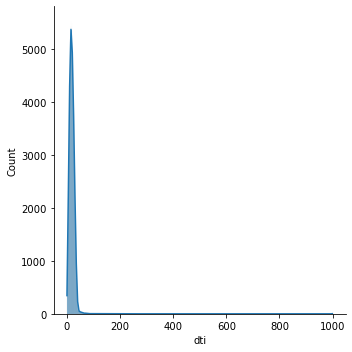

In [87]:
sns.displot(data['dti'], kde=True)
plt.show()

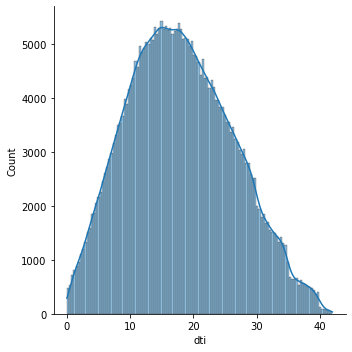

In [90]:
sns.displot(data[data['dti']<42]['dti'], kde=True)    

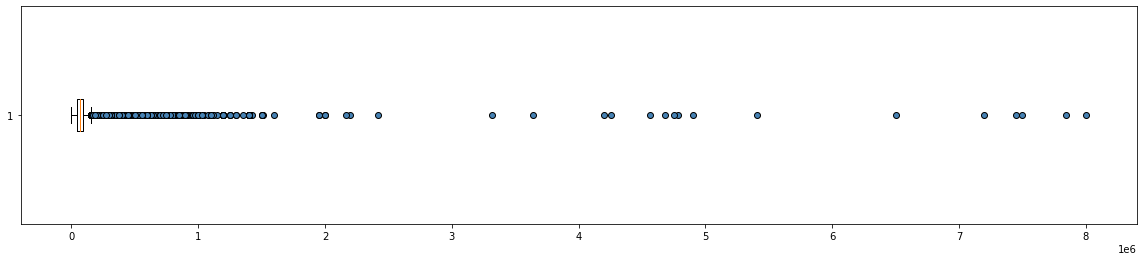

In [92]:
plt.figure(figsize=(20,4))
plt.boxplot(data['annual_inc'], vert=False, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
plt.show()

In [94]:
data['annual_inc'].describe()

count    3.529800e+05
mean     7.612450e+04
std      6.553333e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      8.000000e+06
Name: annual_inc, dtype: float64

In [98]:
data[data['annual_inc']>(9.000000e+04 + 1.5*(9.000000e+04-4.5e+04))].shape

(17501, 87)

In [3]:
data = pd.read_csv(r'E:/python/data/学习赛/LendingClub/datasets/datasets/loan2.csv')
data.head()

loan_amnt  funded_amnt        term  int_rate  installment grade sub_grade  \
0      14000        14000   36 months     13.49       475.03     C        C1   
1      35000        35000   36 months     17.27      1252.56     D        D3   
2      21000        21000   60 months     19.42       549.62     E        E3   
3       6400         6400   36 months     10.65       208.47     B        B2   
4       9500         9500   36 months     11.71       314.23     B        B3   

                  emp_title emp_length home_ownership  ...  revol_util  \
0  Eric J. Coligado, MD, PA    4 years       MORTGAGE  ...        76.1   
1          Roos Instruments  10+ years       MORTGAGE  ...        73.7   
2           JP Morgan Chase    3 years       MORTGAGE  ...        68.9   
3     Waterloo Icehouse Inc    2 years           RENT  ...        68.5   
4              SQA Services    2 years           RENT  ...        90.9   

  total_acc pymnt_plan.1 collection_recovery_fee last_pymnt_d  \
0      17.0            n                     0.0     Mar-2013   
1      28.0            n                     0.0     Feb-2015   
2      10.0            n                     0.0     Mar-2016   
3      15.0            n                     0.0     Feb-2015   
4       6.0            n                     0.0     Jul-2014   

  last_credit_pull_d policy_code acc_now_delinq  chargeoff_within_12_mths  \
0           Nov-2017           1            0.0                       0.0   
1           Feb-2019           1            0.0                       0.0   
2           Mar-2016           1            0.0                       0.0   
3           Apr-2017           1            0.0                       0.0   
4           Apr-2016           1            0.0                       0.0   

   loan_status  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 35 columns]

In [4]:
data.isna().sum()

loan_amnt                   0
funded_amnt                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   2
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
pymnt_plan                  0
purpose                     0
title                       1
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
pymnt_plan.1                0
collection_recovery_fee     0
last_pymnt_d                0
last_credit_pull_d          0
policy_code                 0
acc_now_delinq              0
chargeoff_

In [8]:
data['loan_amnt'].to_frame().describe()

loan_amnt
count  400000.000000
mean    14590.735125
std      8901.095238
min       500.000000
25%      8000.000000
50%     12000.000000
75%     20000.000000
max     40000.000000

In [23]:
loan_amnt = ((data['loan_amnt'] - data['loan_amnt'].mean())/data['loan_amnt'].std()).to_frame()
st = StandardScaler()
st.fit_transform(data['loan_amnt'].to_frame())


array([[-0.06636665],
       [ 2.29289653],
       [ 0.72005441],
       ...,
       [-0.51575011],
       [-0.29105838],
       [ 0.22011531]])

In [26]:
data['term'].map({' 36 months':0,' 60 months':1})

0         0
1         0
2         1
3         0
4         0
         ..
399995    1
399996    1
399997    0
399998    1
399999    1
Name: term, Length: 400000, dtype: int64

In [29]:
box_label = [1,2,3]
box = [0, 20000, 60000, data['annual_inc'].max()+1]
pd.cut(x = data['annual_inc'], bins = box, labels = box_label)

0         3
1         3
2         2
3         2
4         2
         ..
399995    2
399996    2
399997    3
399998    2
399999    2
Name: annual_inc, Length: 400000, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [33]:
issue_d = pd.to_datetime(data['issue_d'])
issue_d.dt.year
issue_d.dt.month

0          2
1          2
2          2
3          2
4          2
          ..
399995    10
399996    10
399997    10
399998    10
399999    10
Name: issue_d, Length: 400000, dtype: int64

In [34]:
### 生成数据
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,         # 样本个数
                           n_features=25,          # 特征个数
                           n_informative=3,        # 有效特征个数
                           n_redundant=2,          # 冗余特征个数（有效特征的随机组合）
                           n_repeated=0,           # 重复特征个数（有效特征和冗余特征的随机组合）
                           n_classes=8,            # 样本类别
                           n_clusters_per_class=1, # 簇的个数
                           random_state=0)

### 特征选择
# RFE
from sklearn.svm import SVC
svc = SVC(kernel="linear")

from sklearn.feature_selection import RFE
rfe = RFE(estimator = svc,           # 基分类器
          n_features_to_select = 2,  # 选择特征个数
          step = 1,                  # 每次迭代移除的特征个数 
          verbose = 1                # 显示中间过程
          ).fit(X,y)
X_RFE = rfe.transform(X)
print("RFE特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfe.n_features_)
print("全部特征等级 : %s" % list(rfe.ranking_))

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
RFE特征选择结果——————————————————————————————————————————————————
有效特征个数 : 2
全部特征等级 : [6, 1, 13, 20, 16, 7, 18, 2, 3, 22, 24, 12, 17, 11, 14, 23, 9, 15, 1, 21, 8, 10, 4, 5, 19]


In [35]:
X_RFE

array([[ 1.88663904, -1.34830846],
       [ 1.72056896,  0.87655629],
       [-0.33284919,  0.26920378],
       ...,
       [-0.52578537, -0.39855873],
       [ 0.89892743,  1.26527407],
       [-0.52905467, -0.40171616]])